# Building an ML Model

The fundamental steps of building any *supervised* model are loosely the following:

$\bullet$ Arrange data into features and target arrays

$\bullet$ Split into training and test set

$\bullet$ Select ML algortihm and its parameters

$\bullet$ Builld model by applying algorithm to training set

$\bullet$ Apply model to features of the test data to predict the target property of the test data

$\bullet$ Estimate the performance of the model using an appropriate metric

# Dataset and Exploration

Before analysing the data, a good practice is to get to know the data.

$\bullet$ Determine the size of the dataset

$\bullet$ Check for missing data--decide how to handle them

$\bullet$ Check whether all features are in a similar numerical range, and if not how to normalize

$\bullet$ In a classification problem determine if the dataset is very imbalanced

$\bullet$ Develop intuition about how well you expect the model to work

In [1]:
# imports

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import pandas as pd

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree, neighbors

import warnings
warnings.filterwarnings('ignore')

plt.style.use("/Users/achro/Downloads/CJ_style.mplstyle") #personal ploting style

In [2]:
"""
For this exercise I will use a selection of data provided from the Planet Habitability Lab
"""

LearningSet = pd.read_csv("HPLearningSet.csv")
LearningSet = LearningSet.drop(LearningSet.columns[0], axis=1) #drops the index column of the dataframe

LearningSet

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0
5,Teegarden's Star b,0.09,4.910000,0.025200,1
6,K2-116 b,0.69,4.655411,0.048086,0
7,GJ 1061 c,0.12,6.689000,0.035000,1
8,HD 68402 b,1.12,1103.000000,2.180981,0
9,Kepler-1544 b,0.81,168.811170,0.557107,1


# Splits, Nodes, and Leaves

Decision trees are defined by *splits* and *nodes*.

*Splits* are binary, corresponding to yes/no, true/false, greater/less than questions

*Nodes* are the partitions that objects fall into. The goal is to obtain pure nodes (they contain only objects of a single type). If not, further splits might be implemented. The final nodes of a decision tree are, sticking to the theme, leaf nodes or *leaves*.

# Good Splits and the Gini Impurity

A formal concept of information gain, or maximum decrease of impurity, for classification is the *Gini Impurity*:

$$\mathrm{GI}=1-\sum_i f(i)^2,$$

where $f(i)$ is the fractional abundance of each class.

The Gini Impurity of a proposed split can be calculated as the sum of the impurities of the two resulting nodes, weighed by the fractional volume of each node with respect to its parent node.

The difference $\Delta \mathrm{GI}$ between two proposed splits provides a measure of which split is decreases the impurity the most.

In [3]:
"""
For the habitable planet example, I will split the data into a training set and a test set. The first
trial will split the data so that the first 13 entries are the training set.
"""

TrainSet = LearningSet.iloc[:13,:] # take the first 13 rows and all their columns
TestSet = LearningSet.iloc[13:,:] # take the rest of the rows and all their columns

In [4]:
TrainSet

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0
5,Teegarden's Star b,0.09,4.910000,0.025200,1
6,K2-116 b,0.69,4.655411,0.048086,0
7,GJ 1061 c,0.12,6.689000,0.035000,1
8,HD 68402 b,1.12,1103.000000,2.180981,0
9,Kepler-1544 b,0.81,168.811170,0.557107,1


In [5]:
TestSet

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
13,HD 104067 b,0.62,55.80600,0.260000,0
14,GJ 4276 b,0.41,13.35200,0.087613,0
15,Kepler-296 f,0.50,63.33627,0.268885,1
16,Kepler-63 b,0.98,9.43415,0.088100,0
17,GJ 3293 d,0.42,48.13450,0.195336,1


In [6]:
"""
These sets both need to be further split into the features (inputs) and labels (outputs).
"""

Xtrain = TrainSet.drop(['P_NAME', 'P_HABITABLE'], axis=1)
Xtest = TestSet.drop(['P_NAME', 'P_HABITABLE'], axis=1)

ytrain = TrainSet.P_HABITABLE
ytest = TestSet.P_HABITABLE

In [7]:
"""
Sometimes the best split found may vary, even with the same training data, if the improvment of the 
criterion is identical for several splits. To get deterministic behavior, the random_state must be
fixed.
"""

model = DecisionTreeClassifier(random_state=3)
model.fit(Xtrain, ytrain)

DecisionTreeClassifier(random_state=3)

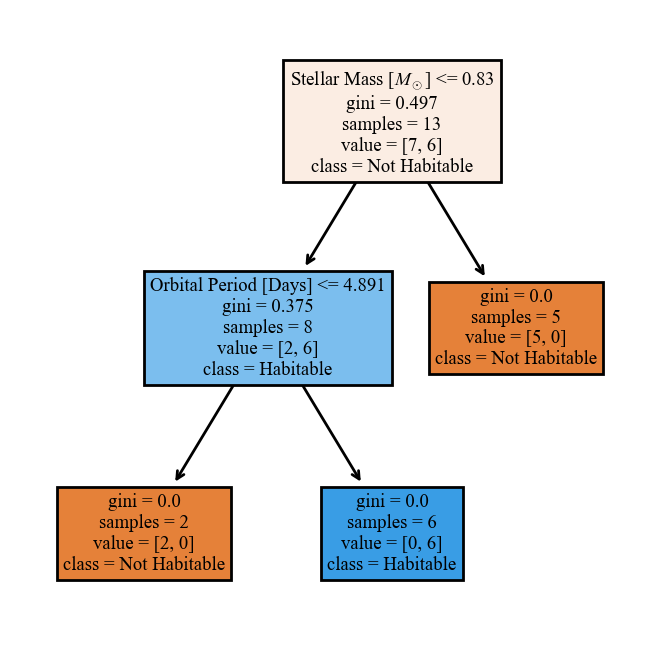

In [8]:
fig, ax = plt.subplots(1, 1)

tree.plot_tree(model, feature_names = ['Stellar Mass [$M_\odot$]', 'Orbital Period [Days]', 'Distance [AU]'],
              class_names = ['Not Habitable', 'Habitable'], ax=ax, filled=True)

plt.show()

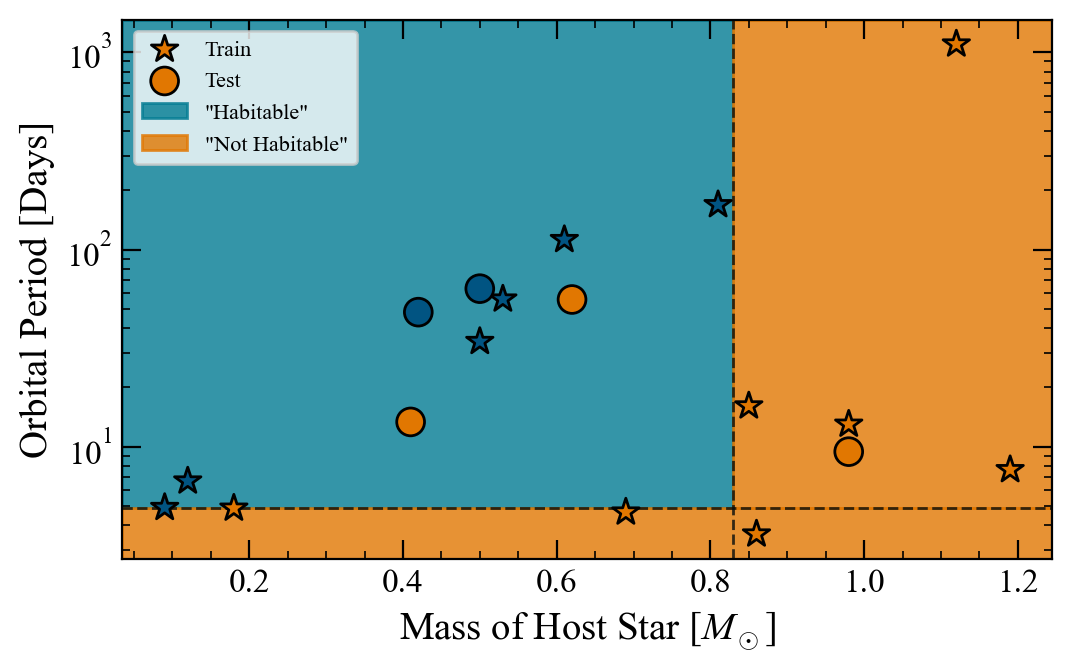

In [9]:
"""
The decision tree shown above contains all the information I need to be able to 
plot the splits selected by the algorthim.
"""

fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['xkcd:pumpkin','xkcd:deep sea blue'])

ax.scatter(TrainSet['S_MASS'], TrainSet['P_PERIOD'], marker='*', s=100,
          c=TrainSet['P_HABITABLE'], cmap=cmap, label='Train', zorder=10, edgecolor='xkcd:black')

ax.scatter(TestSet['S_MASS'], TestSet['P_PERIOD'], marker='o', s=100,
          c=TestSet['P_HABITABLE'], cmap=cmap, label='Test', zorder=10, edgecolor='xkcd:black')

ax.axvline(0.83, lw=1, ls='--', color='xkcd:almost black', alpha=0.8)
ax.axhline(4.891, lw=1, ls='--', color='xkcd:almost black', alpha=0.8)




ax.set_yscale('log')

ax.set_ylabel('Orbital Period [Days]')
ax.set_xlabel('Mass of Host Star [$M_\odot$]')

ax.set_ylim(ax.get_ylim())
ax.set_xlim(ax.get_xlim())

ax.fill_between(x=np.linspace(ax.get_xlim()[0], 0.83), y1=4.891, y2=ax.get_ylim()[1],
               color='xkcd:ocean', alpha=0.8, label='"Habitable"')
ax.fill_between(x=np.linspace(0.83, ax.get_xlim()[1]), y1=4.891, y2=ax.get_ylim()[1],
               color='xkcd:pumpkin', alpha=0.8, label='"Not Habitable"')
ax.fill_between(x=np.linspace(ax.get_xlim()[0], ax.get_xlim()[1]), y1=ax.get_ylim()[0], y2=4.891,
               color='xkcd:pumpkin', alpha=0.8)
ax.legend()
plt.show()

In [10]:
"""
Okay, so I have my decision tree, so I should see how good of a job it does by employing some of
the metrics.
"""

ypred = model.predict(Xtest)
metrics.accuracy_score(ytest, ypred), metrics.accuracy_score(ytrain, model.predict(Xtrain))

(0.6, 1.0)

In [11]:
"""
The model was able to correctly classify everything from the training set, but only had
60% accuracy on the test set. Sometimes this can be improved by looking at how the train/test sets
were constructed. Ideally, one would experiment with different sizes of sets, but for now we will just
take the last 13 rows as the training set instead.
"""

TrainSet2 = LearningSet.iloc[5:,:]
TestSet2 = LearningSet.iloc[:5,:]


In [12]:
Xtrain2 = TrainSet2.drop(['P_NAME', 'P_HABITABLE'], axis=1)
Xtest2 = TestSet2.drop(['P_NAME', 'P_HABITABLE'], axis=1)

ytrain2 = TrainSet2.P_HABITABLE
ytest2 = TestSet2.P_HABITABLE

In [13]:
model = DecisionTreeClassifier(random_state=3)
model.fit(Xtrain2,ytrain2)

DecisionTreeClassifier(random_state=3)

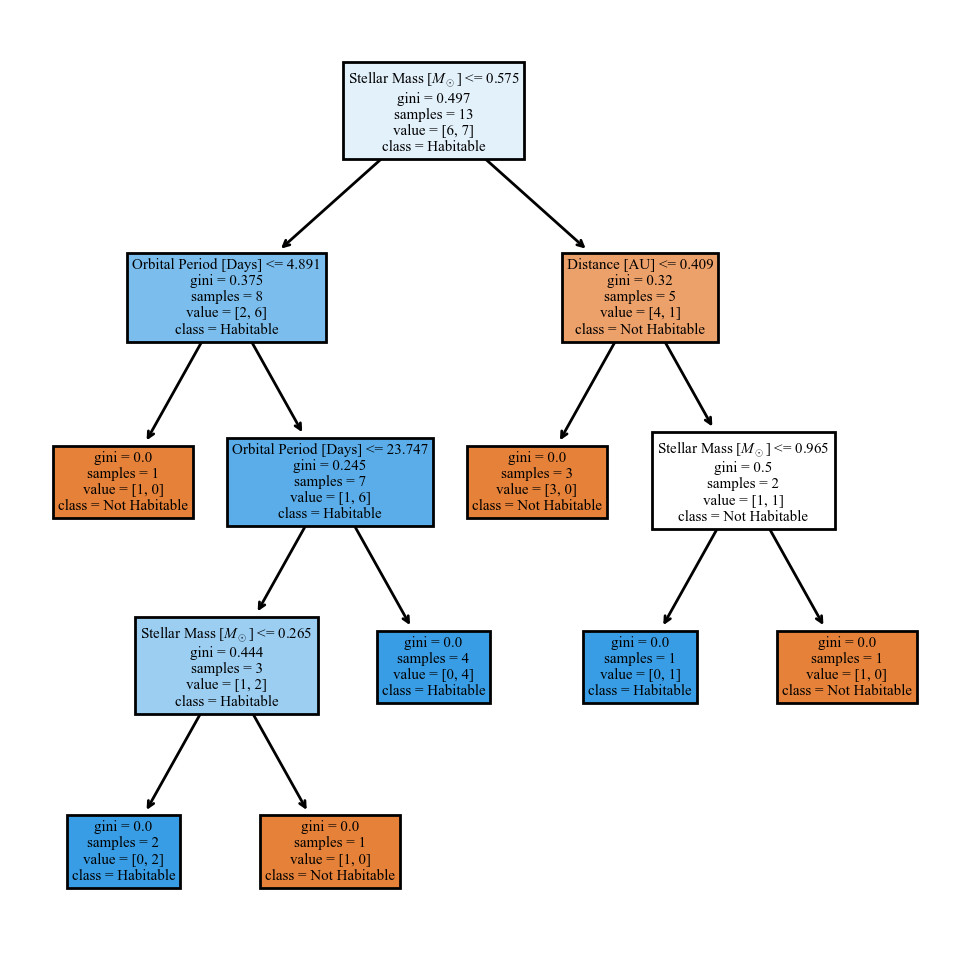

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))

tree.plot_tree(model, feature_names = ['Stellar Mass [$M_\odot$]', 'Orbital Period [Days]', 'Distance [AU]'],
              class_names = ['Not Habitable', 'Habitable'], ax=ax, filled=True)

plt.show()

In [15]:
ypred = model.predict(Xtest2)
metrics.accuracy_score(ytest2, ypred), metrics.accuracy_score(ytrain2, model.predict(Xtrain2))

(1.0, 1.0)

In [16]:
EarthTest = pd.DataFrame(np.column_stack(([1], [1], [1])), columns=['S_MASS', 'P_PERIOD', 'P_DISTANCE'])

In [17]:
model.predict(EarthTest) #predicts that the Earth is not habitable (0 indicates Not Habitable)

array([0], dtype=int64)

# Decision Tree Conclusions

$\bullet$ Decision Trees are fast and easy to make, and highly interpretable.

$\bullet$ It's easy to overfit

$\bullet$ Needs feature engineering if you want to consider combinations of features


# k Nearest Neighbors

This is an ML algorithm that can be employed in classification or regression problems, just like the decision trees. This affords a good comparison to the decision tree classifier above for the same dataset. The kNN algorithm looks for the nearest examples in feature space in the training set and reports back as output the predominate class among those *k* examples. It's a good idea to have k be an odd integer, so as to break any ties.

### Side Note About Fitting

Why do we even need to do a fit? What are we fitting? Fitting a classifer means taking a dataset as input, and the output will be the classifier. The classifier is selected from a space of possible classifiers, and is distinguished from the others by a set of parameters chosen by solving an optimization problem. The classifier is identified by the training data themselves.

In [18]:
"""
Set up is very much the same.
"""

TrainSet_kNN = LearningSet.iloc[:13,:]
TestSet_kNN = LearningSet.iloc[13:,:]

In [19]:
Xtrain = TrainSet.drop(['P_NAME', 'P_HABITABLE'], axis=1)
Xtest = TestSet.drop(['P_NAME', 'P_HABITABLE'], axis=1)

ytrain = TrainSet.P_HABITABLE
ytest = TestSet.P_HABITABLE

In [20]:
model = neighbors.KNeighborsClassifier(n_neighbors=3) # the dataset is rather small, use smaller k

In [21]:
"""
For visualization purposes, using only the first two features to build the model
"""

Xtrain.iloc[:,:2]

,S_MASS,P_PERIOD
0,0.86,3.601472
1,0.85,16.080661
2,1.19,7.638460
3,0.61,112.305300
4,0.98,12.992073
5,0.09,4.910000
6,0.69,4.655411
7,0.12,6.689000
8,1.12,1103.000000
9,0.81,168.811170


In [22]:
model.fit(Xtrain.iloc[:,:2], ytrain)

ytestpred = model.predict(Xtest.iloc[:,:2])

ytestpred, ytest.values #comparison

(array([1, 0, 1, 0, 1], dtype=int64), array([0, 0, 1, 0, 1], dtype=int64))

In [23]:
metrics.accuracy_score(ytrain, model.predict(Xtrain.iloc[:,:2])), metrics.accuracy_score(ytest, model.predict(Xtest.iloc[:,:2]))

(0.6923076923076923, 0.8)

In [24]:
"""
Now that the fitting is complete, I can access the k neighbors for each element in the test set.
The first element gives the distances, the second the index of each neighbor.
"""

model.kneighbors(Xtest.iloc[:,:2])

(array([[ 0.26575741, 21.66422235, 39.72600482],
        [ 0.67412717,  2.76390862,  5.76653597],
        [ 7.28027781, 29.19416   , 47.25690512],
        [ 1.807928  ,  2.87670841,  3.5579225 ],
        [ 7.9223177 , 13.99261869, 32.05672308]]),
 array([[11, 10,  1],
        [ 4,  1,  2],
        [11, 10,  1],
        [ 2,  7,  4],
        [11, 10,  1]], dtype=int64))

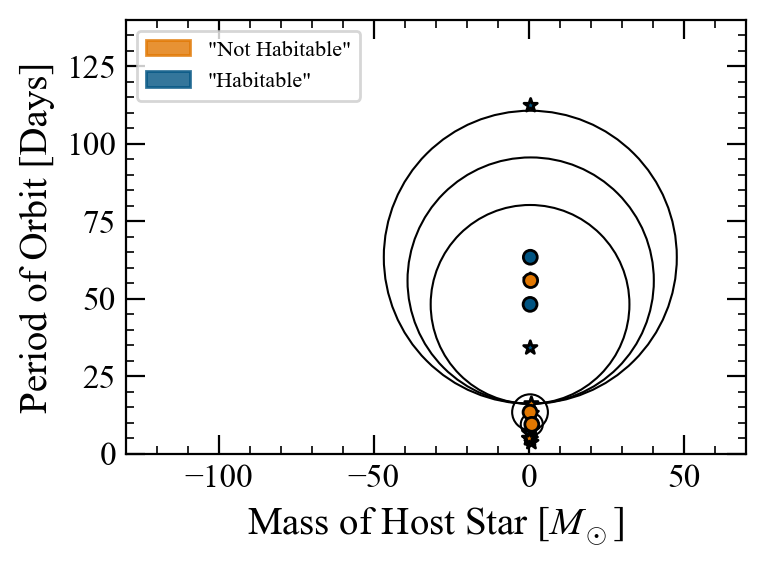

In [25]:
"""
Results can be visualized in a similar manner to the decision tree
"""

fig, ax = plt.subplots(1,  1)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['xkcd:pumpkin','xkcd:deep sea blue'])

ax.scatter(TrainSet['S_MASS'], TrainSet['P_PERIOD'], marker='*', s=25,
          c=TrainSet['P_HABITABLE'], cmap=cmap, label='Train', zorder=10, edgecolor='xkcd:black')

ax.scatter(TestSet['S_MASS'], TestSet['P_PERIOD'], marker='o', s=25,
          c=TestSet['P_HABITABLE'], cmap=cmap, label='Test', zorder=10, edgecolor='xkcd:black')

"""
The circles can be plotted using the fact that the model returns the distance to each of the k
neighbors. Using the farthest point as the radius of the circle encompases all k neightbors. 
So we have one circle for each object in the test set (five, in this case.)
"""
for i in range(len(TestSet)):
    circle = plt.Circle((TestSet['S_MASS'].iloc[i], TestSet['P_PERIOD'].iloc[i]),
                        model.kneighbors(Xtest.iloc[:,:2])[0][i,2], lw=0.75, 
                        edgecolor='xkcd:black', facecolor='none')
    plt.gca().add_artist(circle)

bluepatch = mpatches.Patch(color='xkcd:deep sea blue', label='"Habitable"', alpha=0.8)
orangepatch = mpatches.Patch(color='xkcd:pumpkin', label='"Not Habitable"', alpha=0.8)

ax.legend(handles=[orangepatch, bluepatch], loc='upper left')

plt.gca().set_aspect(1)
plt.xlim(-130,70)
plt.ylim(0,140)
ax.set_xlabel('Mass of Host Star [$M_\odot$]')
ax.set_ylabel('Period of Orbit [Days]')

plt.show()

# The Importance of Standardization

Honestly, the metrics here don't tell us much, since the dataset is so small. The important thing to take away from this is that our two features are not very similar in their range or median. This was not a problem for the decision tree, since we were splitting by one feature at a time. The kNN alogrothim relies on *distances* in feature space, which *is* sensative to different scales.

We can see that the differences in host stellar mass are neglible (they data points are clustered around 0) but the orbital periods vary significantly. The kNN algorithm is making its decisions based on the feature with the largest numerical values, then. This can be rectified by renormalizing the features.

Here I will use sklearn's "RobustScaler" which is resistant to outliers.

In [26]:
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(Xtrain) #only fit the train set!

RobustScaler()

In [27]:
scaledXtrain = scaler.transform(Xtrain)
scaledXtrain

array([[ 0.47222222, -0.18360363, -0.33840183],
       [ 0.44444444,  0.06038761,  0.05671512],
       [ 1.38888889, -0.10467304, -0.14339694],
       [-0.22222222,  1.94175736,  1.60417741],
       [ 0.80555556,  0.        ,  0.        ],
       [-1.66666667, -0.15801948, -0.43679409],
       [ 0.        , -0.16299717, -0.31519247],
       [-1.58333333, -0.12323674, -0.38472405],
       [ 1.19444444, 21.311672  , 11.01745224],
       [ 0.33333333,  3.04655169,  2.38937206],
       [-0.52777778,  0.41352236,  0.3761471 ],
       [-0.44444444,  0.84198052,  0.66159817],
       [-1.41666667, -0.15877753, -0.40201197]])

In [28]:
scaledXtest = scaler.transform(Xtest)

In [29]:
model.fit(scaledXtrain[:,:2], ytrain).predict(scaledXtest[:,:2])

array([1, 0, 1, 0, 1], dtype=int64)

In [30]:
model.kneighbors(scaledXtest[:,:2])

(array([[0.2500478 , 0.53900086, 1.00570768],
        [0.47721081, 0.66005572, 0.79614695],
        [0.16494121, 0.57079985, 1.00501058],
        [0.06956397, 0.35230123, 0.38378203],
        [0.34256727, 0.35245873, 1.07701084]]),
 array([[11, 10,  1],
        [10, 12,  6],
        [11, 10,  3],
        [ 4,  0,  1],
        [11, 10, 12]], dtype=int64))

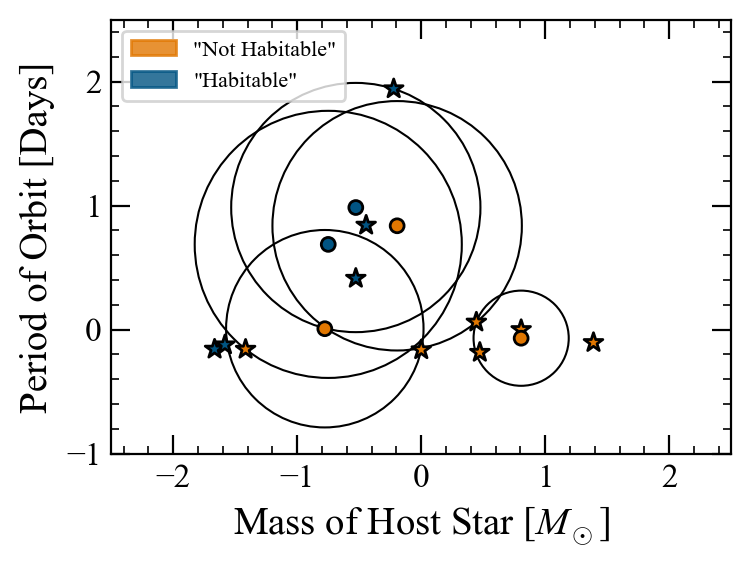

In [31]:
fig, ax = plt.subplots(1,  1)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['xkcd:pumpkin','xkcd:deep sea blue'])

ax.scatter(scaledXtrain[:,0], scaledXtrain[:,1], marker='*', s=50,
          c=ytrain, cmap=cmap, label='Train', zorder=10, edgecolor='xkcd:black')

ax.scatter(scaledXtest[:,0], scaledXtest[:,1], marker='o', s=25,
          c=ytest, cmap=cmap, label='Test', zorder=10, edgecolor='xkcd:black')

for i in range(len(TestSet)):
    circle = plt.Circle((scaledXtest[i,0], scaledXtest[i,1]),
                        model.kneighbors(scaledXtest[:,:2])[0][i,2], lw=0.75, 
                        edgecolor='xkcd:black', facecolor='none')
    plt.gca().add_artist(circle)

bluepatch = mpatches.Patch(color='xkcd:deep sea blue', label='"Habitable"', alpha=0.8)
orangepatch = mpatches.Patch(color='xkcd:pumpkin', label='"Not Habitable"', alpha=0.8)

ax.legend(handles=[orangepatch, bluepatch], loc='upper left')

plt.gca().set_aspect(1)
plt.xlim(-2.5,2.5)
plt.ylim(-1.,2.5)
ax.set_xlabel('Mass of Host Star [$M_\odot$]')
ax.set_ylabel('Period of Orbit [Days]')

plt.show()